In [31]:
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# #To work Locally

# dem_path = "MARS-Dataset/training_site/DEM/Low-res_DEM/"
# lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
# hill_shade_path = dem_path + 'Hillshade.tif'

In [ ]:
# To work on Colab

!pip install gdal
!pip install mpld3

from google.colab import drive
drive.mount('/content/drive')

dem_path = "/content/drive/My Drive/Image Segmentation/"
lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
hill_shade_path = dem_path + 'Hillshade.tif'

In [32]:
ds = gdal.Open(lowres_dem_path, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()
img_array.shape

(632, 358)

In [33]:
X = img_array.reshape((-1,1))

In [34]:
kmeans = cluster.KMeans(n_clusters=50)
kmeans.fit(X)
# kmeans.labels_

KMeans(n_clusters=50)

In [35]:
X_cluster = kmeans.labels_
X_cluster = X_cluster.reshape(img_array.shape)

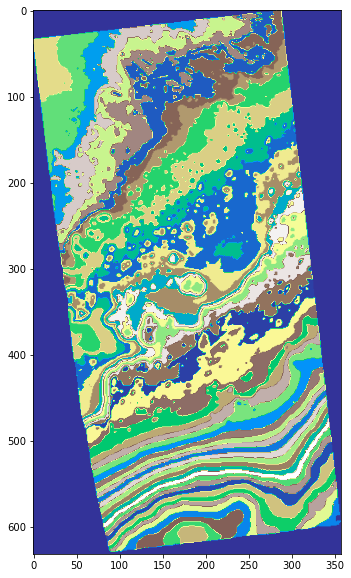

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(X_cluster, cmap="terrain")
plt.show()

In [42]:
format = "GTiff"
driver = gdal.GetDriverByName(format)

[cols, rows] = img_array.shape

outDataRaster = driver.Create("k_means.tif", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection())##sets same projection as input


outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

outDataRaster.FlushCache() ## remove from memory
del outDataRaster ## delete the data (not the actual geotiff)